In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LeakyReLU, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Sample dataset for fraud detection (assuming features are already preprocessed)
# Assume 'X' contains feature vectors and 'y' contains labels (0 for legitimate, 1 for fraudulent)
# Replace this with your actual dataset
X = np.array([
    [0.2, 0.3, 0.5],
    [0.3, 0.5, 0.7],
    [0.1, 0.2, 0.4],
    [0.8, 0.7, 0.9],
    [0.6, 0.9, 0.8]
])
y = np.array([1, 1, 0, 0, 0])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
X_train

array([[0.6, 0.9, 0.8],
       [0.1, 0.2, 0.4],
       [0.2, 0.3, 0.5],
       [0.8, 0.7, 0.9]])

In [13]:
import numpy as np


# Define the generator network
def build_generator(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(128, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(X_train.shape[1], activation='tanh')(x)
    model = Model(inputs, outputs)
    return model

# Define the discriminator network
def build_discriminator(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation=LeakyReLU(alpha=0.2))(inputs)
    x = Dense(32, activation=LeakyReLU(alpha=0.2))(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    generated_data = generator(gan_input)
    gan_output = discriminator(generated_data)
    gan = Model(gan_input, gan_output)
    return gan

# Hyperparameters
latent_dim = 100
epochs = 100
batch_size = 32

# Build the generator and discriminator models
generator = build_generator(latent_dim)
discriminator = build_discriminator(X_train.shape[1])

# Compile discriminator and generator models
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Lists to store losses for plotting
discriminator_losses = []
generator_losses = []

# Training the GAN
for epoch in range(epochs):
    discriminator_loss = 0  # Define before loop to accumulate losses
    generator_loss = 0  # Define before loop to accumulate losses
    num_batches = X_train.shape[0] // batch_size  # Calculate number of batches
    if num_batches == 0:
        num_batches = 1  # Handle case where batch size is larger than the training set size
    for _ in range(num_batches):
        # Generate random noise as input to the generator
        noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
        # Generate synthetic samples using the generator
        generated_data = generator.predict(noise)
        # Combine real and synthetic samples
        X_combined = np.concatenate([X_train, generated_data])
        y_combined = np.concatenate([np.ones((X_train.shape[0], 1)), np.zeros((batch_size, 1))])
        # Train the discriminator
        discriminator_loss += discriminator.train_on_batch(X_combined, y_combined)  # Accumulate loss
        # Train the generator
        noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
        y_gen = np.ones((batch_size, 1))
        generator_loss += gan.train_on_batch(noise, y_gen)  # Accumulate loss
    # Print progress
    print(f"Epoch: {epoch+1}, Discriminator Loss: {discriminator_loss / num_batches}, Generator Loss: {generator_loss / num_batches}")
    discriminator_losses.append(discriminator_loss)
    generator_losses.append(generator_loss)

# Generate synthetic samples using the trained generator
num_samples = 5
noise = np.random.normal(0, 1, size=[num_samples, latent_dim])
generated_samples = generator.predict(noise)
print("Generated Samples:")
print(generated_samples)


1/1 [==============================] - 0s 87ms/step
Epoch: 1, Discriminator Loss: 0.6179484128952026, Generator Loss: 0.7943806648254395
1/1 [==============================] - 0s 31ms/step
Epoch: 2, Discriminator Loss: 0.6515042185783386, Generator Loss: 0.8098400831222534
1/1 [==============================] - 0s 40ms/step
Epoch: 3, Discriminator Loss: 0.6518166661262512, Generator Loss: 0.8179715871810913
1/1 [==============================] - 0s 27ms/step
Epoch: 4, Discriminator Loss: 0.6335600018501282, Generator Loss: 0.7874495983123779
1/1 [==============================] - 0s 47ms/step
Epoch: 5, Discriminator Loss: 0.6462969183921814, Generator Loss: 0.7979145050048828
1/1 [==============================] - 0s 37ms/step
Epoch: 6, Discriminator Loss: 0.6450662016868591, Generator Loss: 0.7825142741203308
1/1 [==============================] - 0s 31ms/step
Epoch: 7, Discriminator Loss: 0.6490478515625, Generator Loss: 0.7738081216812134
1/1 [==============================] - 0s 49

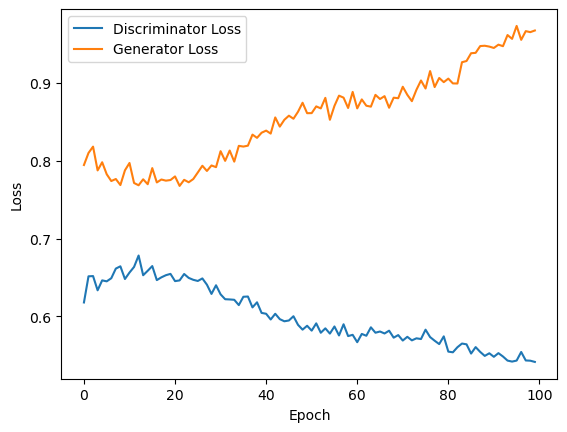

In [14]:
# Plot the losses
plt.plot(discriminator_losses, label='Discriminator Loss')
plt.plot(generator_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 10000

# Generate synthetic data for each variable
amount = np.random.normal(loc=100, scale=50, size=num_samples)
last_address_change_days = np.random.randint(0, 365, size=num_samples)
tran_util = np.random.uniform(0, 1, size=num_samples)
no_of_transaction_30_days = np.random.poisson(lam=10, size=num_samples)
amount_trans_in_30_days = np.random.exponential(scale=100, size=num_samples)
no_of_transaction_60_days = np.random.poisson(lam=20, size=num_samples)
amount_trans_in_60_days = np.random.exponential(scale=200, size=num_samples)

# Combine variables into a DataFrame
data = pd.DataFrame({
    'amount': amount,
    'last_address_change_days': last_address_change_days,
    'tran_util': tran_util,
    'no_of_transaction_30_days': no_of_transaction_30_days,
    'amount_trans_in_30_days': amount_trans_in_30_days,
    'no_of_transaction_60_days': no_of_transaction_60_days,
    'amount_trans_in_60_days': amount_trans_in_60_days
})

# Assign labels for fraud (0 or 1) to maintain 0.2% fraud rate
data['fraud'] = np.random.choice([0, 1], size=num_samples, p=[0.998, 0.002])

# Validate synthetic dataset (perform descriptive statistics, distribution comparison, correlation analysis, and model performance evaluation)
# Your validation code here...
data.head()

,amount,last_address_change_days,tran_util,no_of_transaction_30_days,amount_trans_in_30_days,no_of_transaction_60_days,amount_trans_in_60_days,fraud
0,124.835708,361,0.718406,7,21.095826,20,79.178537,0
1,93.086785,119,0.203722,14,65.632832,27,15.298323,0
2,132.384427,336,0.646469,15,28.566681,18,179.609113,0
3,176.151493,30,0.687088,9,64.535343,13,789.204047,0
4,88.292331,180,0.255202,9,73.642174,21,409.415097,0


In [16]:
data['fraud'].value_counts()

0    9984
1      16
Name: fraud, dtype: int64

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import Dense, LeakyReLU, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Function to generate synthetic data
def generate_synthetic_data_gan(num_samples):
    latent_dim = 100  # Dimension of the latent space
    num_features = 7  # Number of features in the dataset

    # Define generator model
    def build_generator(latent_dim, num_features):
        inputs = Input(shape=(latent_dim,))
        x = Dense(128, activation='relu')(inputs)
        x = Dense(64, activation='relu')(x)
        outputs = Dense(num_features, activation='tanh')(x)
        model = Model(inputs, outputs)
        return model

    # Generate synthetic data using the generator
    def generate_synthetic_samples(generator, latent_dim, num_samples):
        noise = np.random.normal(0, 1, size=[num_samples, latent_dim])
        synthetic_data = generator.predict(noise)
        return synthetic_data

    # Build generator model
    generator = build_generator(latent_dim, num_features)

    # Generate synthetic samples using the generator
    synthetic_data = generate_synthetic_samples(generator, latent_dim, num_samples)

    return synthetic_data

# Function to perform validation steps
def validate_synthetic_data(data):
    # 1. Descriptive statistics
    print(data.describe())

    # 2. Distribution comparison
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i+1)
        sns.histplot(data[col], bins=30, kde=True, color='blue', alpha=0.5, label='Synthetic')
        plt.xlabel(col)
        plt.legend()
    plt.tight_layout()
    plt.show()

    # 3. Correlation analysis
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # 4. Model performance evaluation (assuming you have real-world data)
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(data.drop('fraud', axis=1), data['fraud'], test_size=0.2, random_state=42)

    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Evaluate model performance
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



313/313 [==============================] - 1s 2ms/step
             amount  last_address_change_days     tran_util  \
count  10000.000000              10000.000000  10000.000000   
mean      -0.096276                  0.384288      0.069500   
std        0.442154                  0.386640      0.395686   
min       -0.965982                 -0.857247     -0.970249   
25%       -0.449665                  0.128078     -0.220721   
50%       -0.125710                  0.453558      0.092114   
75%        0.237914                  0.694101      0.375815   
max        0.977161                  0.993249      0.939892   

       no_of_transaction_30_days  amount_trans_in_30_days  \
count               10000.000000             10000.000000   
mean                    0.103411                -0.271414   
std                     0.427672                 0.373929   
min                    -0.975258                -0.973655   
25%                    -0.219812                -0.563488   
50%        

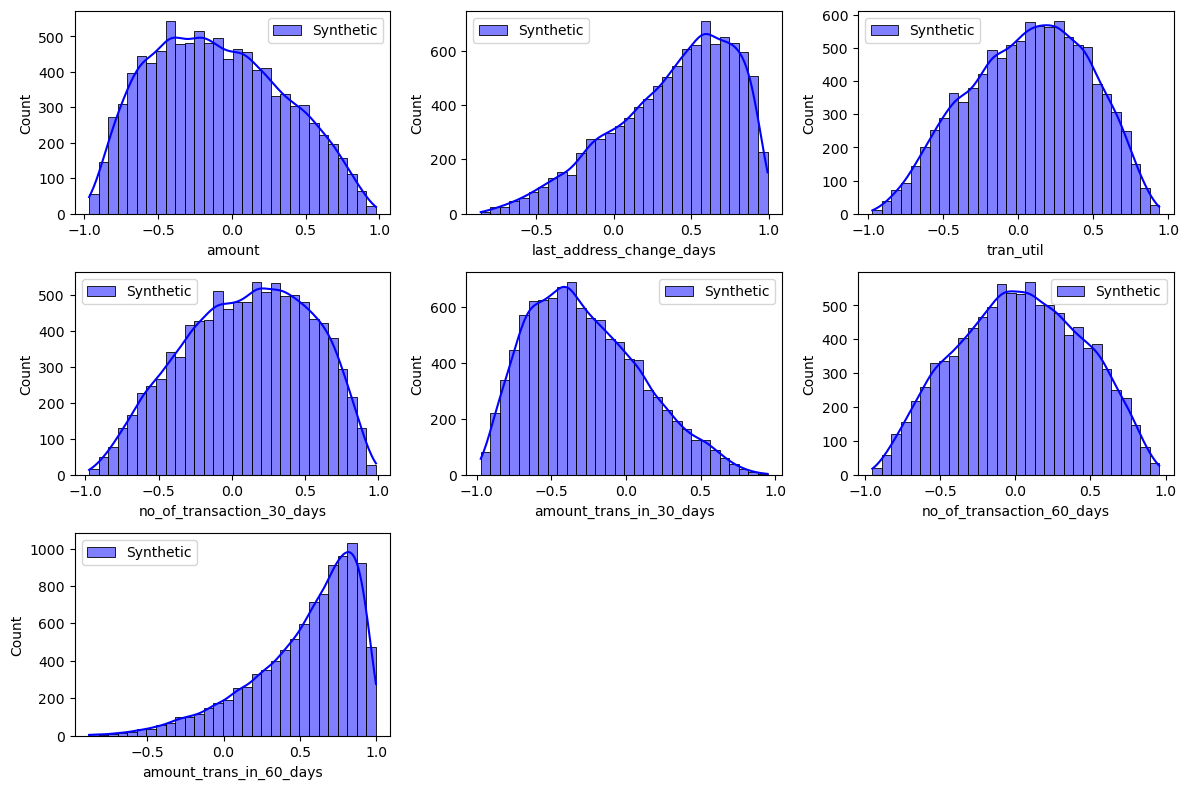

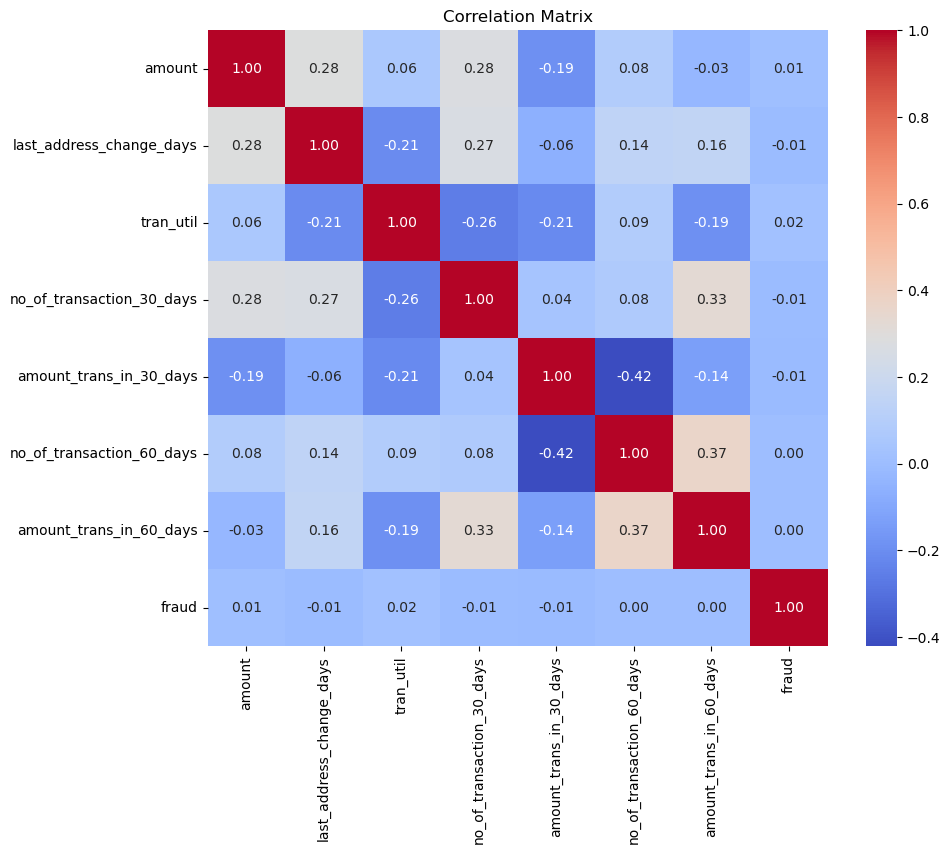

Accuracy: 0.9985
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       0.00      0.00      0.00         3

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000



C:\Users\pixel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pixel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pixel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Generate synthetic dataset using GAN
num_samples = 10000
synthetic_data_gan = generate_synthetic_data_gan(num_samples)

# Convert synthetic data to DataFrame
synthetic_data_gan_df = pd.DataFrame(synthetic_data_gan, columns=['amount', 'last_address_change_days', 'tran_util',
                                                                  'no_of_transaction_30_days', 'amount_trans_in_30_days',
                                                                  'no_of_transaction_60_days', 'amount_trans_in_60_days'])

# Add fraud labels to maintain 0.2% fraud rate
synthetic_data_gan_df['fraud'] = np.random.choice([0, 1], size=num_samples, p=[0.998, 0.002])

# Validate synthetic dataset
validate_synthetic_data(synthetic_data_gan_df)


In [19]:
synthetic_data_gan_df.head()

,amount,last_address_change_days,tran_util,no_of_transaction_30_days,amount_trans_in_30_days,no_of_transaction_60_days,amount_trans_in_60_days,fraud
0,-0.163624,0.929635,-0.535009,-0.459720,-0.543280,0.139038,0.735013,0
1,0.418551,0.756093,-0.284782,0.441310,0.611232,-0.125102,0.866666,0
2,0.169756,0.007916,0.321662,-0.512579,-0.094282,-0.182014,-0.105671,0
3,0.352623,0.571150,-0.002209,0.040006,-0.226374,0.055029,0.859905,0
4,0.082375,0.855667,-0.500310,0.621222,-0.639082,-0.252288,0.723333,0


In [20]:
synthetic_data_gan_df.shape

(10000, 8)

In [21]:
data.shape

(10000, 8)

In [23]:
synthetic_data_gan_df['fraud'].value_counts()

0    9980
1      20
Name: fraud, dtype: int64

In [24]:
data['fraud'].value_counts()

0    9984
1      16
Name: fraud, dtype: int64

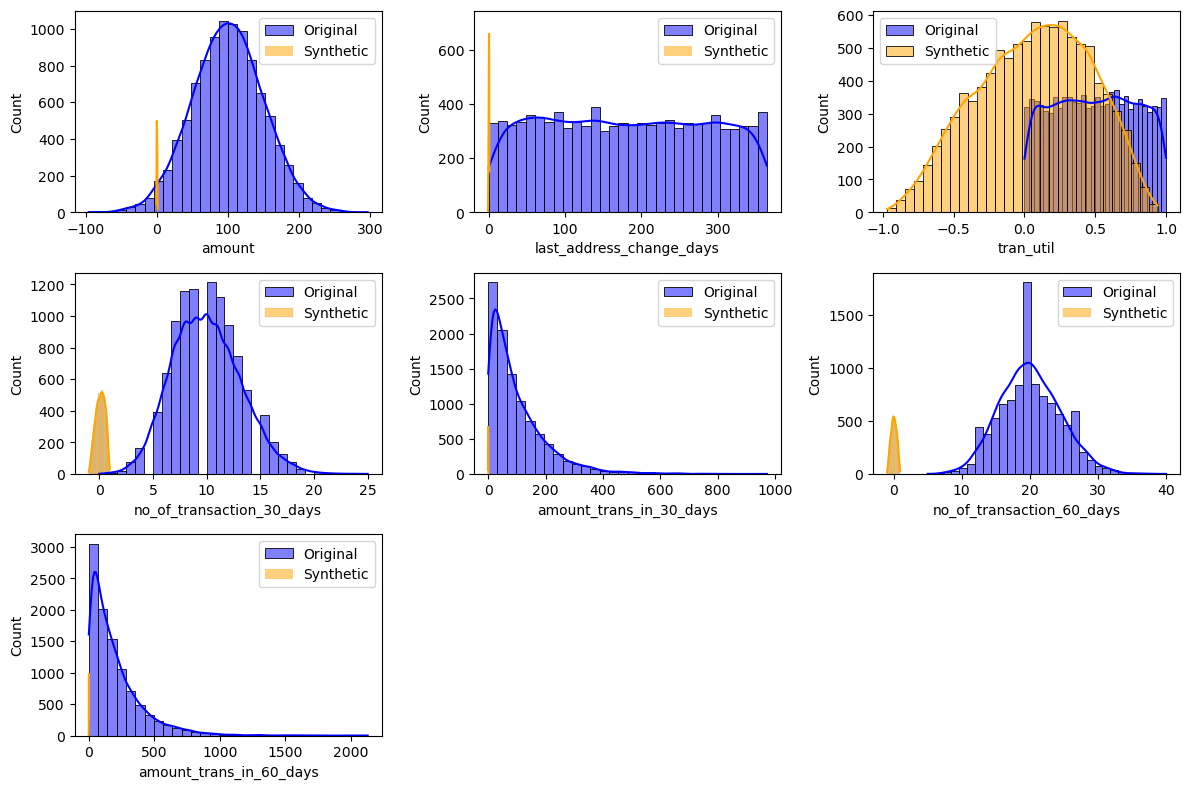

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compare distributions of original and synthetic datasets
def compare_distributions(original_data, synthetic_data):
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(original_data.columns[:-1]):
        plt.subplot(3, 3, i+1)
        sns.histplot(original_data[col], bins=30, kde=True, color='blue', alpha=0.5, label='Original')
        sns.histplot(synthetic_data[col], bins=30, kde=True, color='orange', alpha=0.5, label='Synthetic')
        plt.xlabel(col)
        plt.legend()
    plt.tight_layout()
    plt.show()

# Compare distributions of original and synthetic datasets
compare_distributions(data, synthetic_data_gan_df)


In [27]:
from scipy.stats import ks_2samp

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(data['amount'], synthetic_data_gan_df['amount'])

# Print test results
print("Kolmogorov-Smirnov Test:")
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)


Kolmogorov-Smirnov Test:
KS Statistic: 0.976
P-value: 0.0


In [29]:
from scipy.stats import ks_2samp

# Custom function to perform Kolmogorov-Smirnov test for each variable
def compare_distributions_ks(data, synthetic_data):
    print("Comparison of distributions using Kolmogorov-Smirnov test:")
    for col in data.columns[:-1]:  # Exclude the last column (target variable)
        ks_statistic, p_value = ks_2samp(data[col], synthetic_data[col])
        print(f"Variable: {col}")
        print("KS Statistic:", ks_statistic)
        print("P-value:", p_value)
        if p_value > 0.05:
            print("Conclusion: The distributions are likely similar.")
        else:
            print("Conclusion: The distributions are likely different.")
        print()

# Compare distributions of original and synthetic datasets using Kolmogorov-Smirnov test
compare_distributions_ks(data, synthetic_data_gan_df)


Comparison of distributions using Kolmogorov-Smirnov test:
Variable: amount
KS Statistic: 0.976
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: last_address_change_days
KS Statistic: 0.9976
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: tran_util
KS Statistic: 0.4206
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: no_of_transaction_30_days
KS Statistic: 0.9999
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: amount_trans_in_30_days
KS Statistic: 0.9919
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: no_of_transaction_60_days
KS Statistic: 1.0
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: amount_trans_in_60_days
KS Statistic: 0.9948
P-value: 0.0
Conclusion: The distributions are likely different.



In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LeakyReLU, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from scipy.stats import ks_2samp

# Function to generate synthetic data using GAN
def generate_synthetic_data_gan(num_samples):
    latent_dim = 100  # Dimension of the latent space
    num_features = 8  # Number of features in the dataset

    # Define generator model
    generator = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        Dense(64),
        LeakyReLU(alpha=0.2),
        Dense(num_features, activation='tanh')
    ])

    # Define discriminator model
    discriminator = Sequential([
        Dense(64, input_dim=num_features),
        LeakyReLU(alpha=0.2),
        Dense(32),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile discriminator model
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

    # Compile GAN model
    gan = Sequential([generator, discriminator])
    gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

    # Generate synthetic data using the generator
    noise = np.random.normal(0, 1, size=[num_samples, latent_dim])
    synthetic_data = generator.predict(noise)

    return synthetic_data

# Function to perform Kolmogorov-Smirnov test for each variable
def compare_distributions(original_data, synthetic_data):
    print("Comparison of distributions using Kolmogorov-Smirnov test:")
    for col in original_data.columns:
        ks_statistic, p_value = ks_2samp(original_data[col], synthetic_data[col])
        print(f"Variable: {col}")
        print("KS Statistic:", ks_statistic)
        print("P-value:", p_value)
        if p_value > 0.05:
            print("Conclusion: The distributions are likely similar.")
        else:
            print("Conclusion: The distributions are likely different.")
        print()

# Load original dataset
#original_data = pd.read_csv('original_dataset.csv')

original_data = data

# Generate synthetic dataset using GAN
num_samples = len(original_data)
synthetic_data_gan = generate_synthetic_data_gan(num_samples)

# Convert synthetic data to DataFrame
synthetic_data_gan_df = pd.DataFrame(synthetic_data_gan, columns=original_data.columns)

# Normalize synthetic data
scaler = MinMaxScaler()
synthetic_data_gan_df_scaled = pd.DataFrame(scaler.fit_transform(synthetic_data_gan_df), columns=original_data.columns)

# Compare distributions of original and synthetic datasets using Kolmogorov-Smirnov test
compare_distributions(original_data, synthetic_data_gan_df_scaled)


C:\Users\pixel\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


313/313 [==============================] - 1s 2ms/step
Comparison of distributions using Kolmogorov-Smirnov test:
Variable: amount
KS Statistic: 0.976
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: last_address_change_days
KS Statistic: 0.9975
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: tran_util
KS Statistic: 0.2814
P-value: 1e-323
Conclusion: The distributions are likely different.

Variable: no_of_transaction_30_days
KS Statistic: 0.9998
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: amount_trans_in_30_days
KS Statistic: 0.9913
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: no_of_transaction_60_days
KS Statistic: 1.0
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: amount_trans_in_60_days
KS Statistic: 0.9948
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: fraud
KS Statistic: 0.9983
P-value: 0.0
Conclusion: The 

In [31]:
original_data.head()

,amount,last_address_change_days,tran_util,no_of_transaction_30_days,amount_trans_in_30_days,no_of_transaction_60_days,amount_trans_in_60_days,fraud
0,124.835708,361,0.718406,7,21.095826,20,79.178537,0
1,93.086785,119,0.203722,14,65.632832,27,15.298323,0
2,132.384427,336,0.646469,15,28.566681,18,179.609113,0
3,176.151493,30,0.687088,9,64.535343,13,789.204047,0
4,88.292331,180,0.255202,9,73.642174,21,409.415097,0


In [32]:
original_data.shape

(10000, 8)

313/313 [==============================] - 1s 2ms/step
Comparison of distributions using Kolmogorov-Smirnov test:
Variable: amount
KS Statistic: 0.976
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: last_address_change_days
KS Statistic: 0.9975
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: tran_util
KS Statistic: 0.4412
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: no_of_transaction_30_days
KS Statistic: 0.9999
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: amount_trans_in_30_days
KS Statistic: 0.9913
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: no_of_transaction_60_days
KS Statistic: 1.0
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: amount_trans_in_60_days
KS Statistic: 0.9948
P-value: 0.0
Conclusion: The distributions are likely different.

Variable: fraud
KS Statistic: 0.9983
P-value: 0.0
Conclusion: The dis

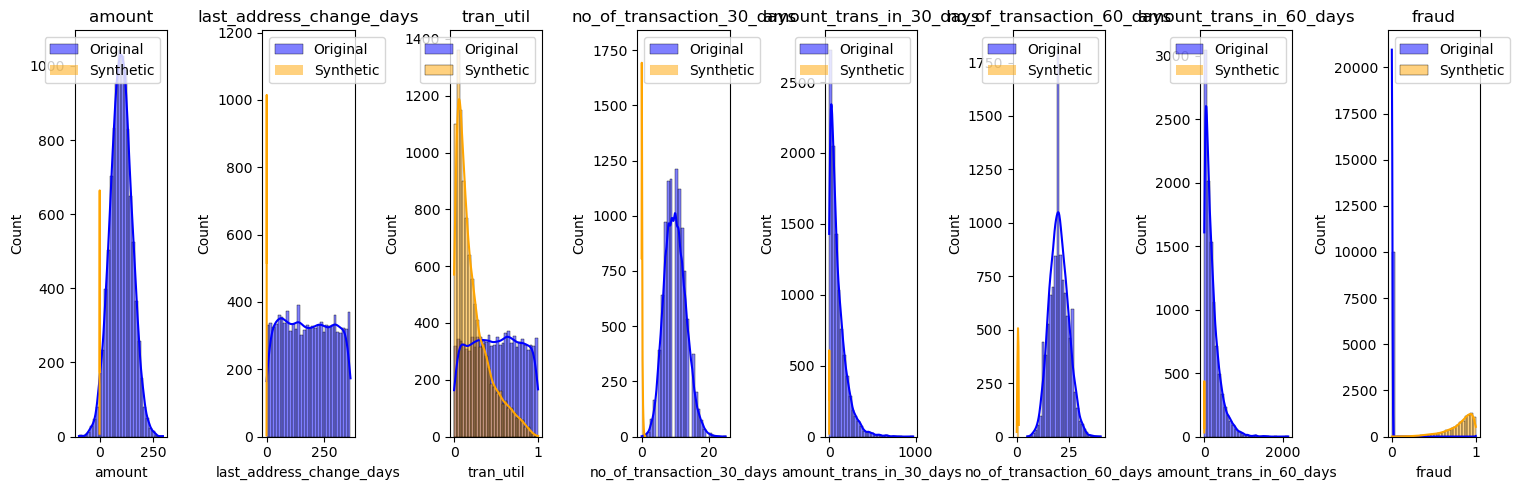

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from scipy.stats import ks_2samp

# Function to generate synthetic data using GAN
def generate_synthetic_data_gan(num_samples):
    latent_dim = 100  # Dimension of the latent space
    num_features = 8  # Number of features in the dataset

    # Define generator model
    generator = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        Dense(64),
        LeakyReLU(alpha=0.2),
        Dense(num_features, activation='tanh')
    ])

    # Define discriminator model
    discriminator = Sequential([
        Dense(64, input_dim=num_features),
        LeakyReLU(alpha=0.2),
        Dense(32),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile discriminator model
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

    # Compile GAN model
    gan = Sequential([generator, discriminator])
    gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

    # Generate synthetic data using the generator
    noise = np.random.normal(0, 1, size=[num_samples, latent_dim])
    synthetic_data = generator.predict(noise)

    return synthetic_data

# Function to perform Kolmogorov-Smirnov test for each variable
def compare_distributions(original_data, synthetic_data):
    print("Comparison of distributions using Kolmogorov-Smirnov test:")
    for col in original_data.columns:
        ks_statistic, p_value = ks_2samp(original_data[col], synthetic_data[col])
        print(f"Variable: {col}")
        print("KS Statistic:", ks_statistic)
        print("P-value:", p_value)
        if p_value > 0.05:
            print("Conclusion: The distributions are likely similar.")
        else:
            print("Conclusion: The distributions are likely different.")
        print()

# Function to plot histograms of original and synthetic datasets
def plot_histograms(original_data, synthetic_data):
    num_cols = len(original_data.columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 5))
    for i, col in enumerate(original_data.columns):
        sns.histplot(original_data[col], bins=30, kde=True, color='blue', alpha=0.5, ax=axes[i], label='Original')
        sns.histplot(synthetic_data[col], bins=30, kde=True, color='orange', alpha=0.5, ax=axes[i], label='Synthetic')
        axes[i].set_title(col)
        axes[i].legend()
    plt.tight_layout()
    plt.show()

# Load original dataset
original_data = data

# Generate synthetic dataset using GAN
num_samples = len(original_data)
synthetic_data_gan = generate_synthetic_data_gan(num_samples)

# Convert synthetic data to DataFrame
synthetic_data_gan_df = pd.DataFrame(synthetic_data_gan, columns=original_data.columns)

# Normalize synthetic data
scaler = MinMaxScaler()
synthetic_data_gan_df_scaled = pd.DataFrame(scaler.fit_transform(synthetic_data_gan_df), columns=original_data.columns)

# Compare distributions of original and synthetic datasets using Kolmogorov-Smirnov test
compare_distributions(original_data, synthetic_data_gan_df_scaled)

# Plot histograms of original and synthetic datasets
plot_histograms(original_data, synthetic_data_gan_df_scaled)


In [36]:
synthetic_data_gan_df.head()

,amount,last_address_change_days,tran_util,no_of_transaction_30_days,amount_trans_in_30_days,no_of_transaction_60_days,amount_trans_in_60_days,fraud
0,0.665499,-0.134483,-0.403637,-0.100631,0.500235,-0.273055,-0.287311,0.456077
1,0.587615,0.354570,-0.284243,-0.243186,0.660981,0.758567,0.289159,0.490756
2,0.343222,0.554960,-0.723181,-0.839102,-0.058381,-0.462818,0.458900,0.654344
3,0.196902,0.776191,-0.219418,-0.986202,0.211884,-0.815111,-0.301730,0.917315
4,0.583786,0.376427,-0.466338,-0.904382,0.402887,-0.173272,-0.439957,0.304149


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load original dataset
original_data = data

# Split original dataset into features and target variable
X = original_data.drop('fraud', axis=1)
y = original_data['fraud']

# Split original dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base model (Random Forest Classifier)
base_model = RandomForestClassifier(random_state=42)

# Train base model using original dataset
base_model.fit(X_train, y_train)

# Evaluate base model performance using original dataset
print("Base Model Performance on Original Dataset:")
y_pred_original = base_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Classification Report:")
print(classification_report(y_test, y_pred_original))

# Load synthetic dataset
synthetic_data = synthetic_data_gan_df

# Split synthetic dataset into features and target variable
X_synthetic = synthetic_data.drop('fraud', axis=1)
y_synthetic = synthetic_data['fraud']

# Evaluate base model performance using synthetic dataset
print("\nBase Model Performance on Synthetic Dataset:")
y_pred_synthetic = base_model.predict(X_synthetic)
print("Accuracy:", accuracy_score(y_synthetic, y_pred_synthetic))
print("Classification Report:")
print(classification_report(y_synthetic, y_pred_synthetic))


Base Model Performance on Original Dataset:
Accuracy: 0.998
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.00      0.00      0.00         4

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000


Base Model Performance on Synthetic Dataset:


C:\Users\pixel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pixel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pixel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Classification metrics can't handle a mix of continuous and binary targets